In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# cwd = os.getcwd()
# cwd

In [3]:
# raw_csv_data = pd.read_csv(cwd + '\TG.csv')
raw_csv_data = pd.read_csv('WB.csv')
df=raw_csv_data.copy()

In [4]:
para = 'Confirmed'

In [5]:
df.Date.describe()

count           115
unique          115
top       25-Apr-20
freq              1
Name: Date, dtype: object

In [6]:
df

,Date,Confirmed,Recovered,Decreased
0,14-Mar-20,0,0,0
1,15-Mar-20,0,0,0
2,16-Mar-20,0,0,0
3,17-Mar-20,1,0,0
4,18-Mar-20,0,0,0
...,...,...,...,...
110,02-Jul-20,649,509,16
111,03-Jul-20,669,534,18
112,04-Jul-20,743,595,19
113,05-Jul-20,895,545,21


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
df.head()

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0


In [9]:
df

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0
...,...,...,...,...
110,2020-07-02,649,509,16
111,2020-07-03,669,534,18
112,2020-07-04,743,595,19
113,2020-07-05,895,545,21


In [10]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [11]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


In [12]:
# df.Date.describe()

In [13]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


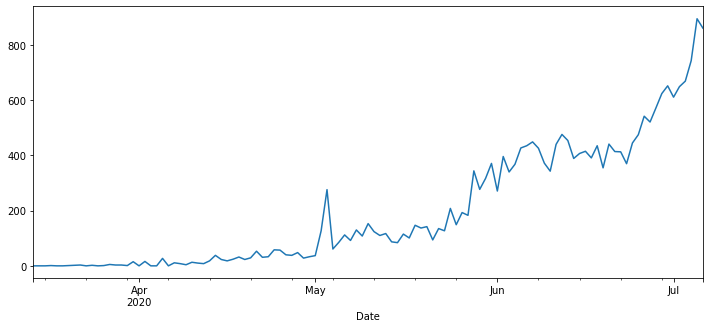

In [14]:
df[para].plot(figsize=(12,5));

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df[para])

Augmented Dickey-Fuller Test: 
ADF test statistic        3.012013
p-value                   1.000000
# lags used               4.000000
# observations          110.000000
critical value (1%)      -3.491245
critical value (5%)      -2.888195
critical value (10%)     -2.580988
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


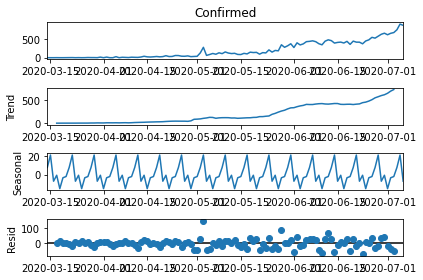

In [17]:
result = seasonal_decompose(df[para])
result.plot();

In [18]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df[para],k_diff=2)

In [19]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.131971e+00
p-value                 3.498787e-10
# lags used             8.000000e+00
# observations          1.040000e+02
critical value (1%)    -3.494850e+00
critical value (5%)    -2.889758e+00
critical value (10%)   -2.581822e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
# stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
#                           max_p=4, max_q=4,
#                           seasonal=False,
#                           d=None, trace=True,
#                           error_action='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings=True,  # we don't want convergence warnings
#                           stepwise=True)           # set to stepwise

# stepwise_fit.summary()

stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
                          max_p=4, max_q=4,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True,           # set to stepwise
                         frequency=8)

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=1311.216, BIC=1316.671, Time=0.011 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=1252.043, BIC=1260.225, Time=0.034 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=1204.251, BIC=1212.433, Time=0.127 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=1309.218, BIC=1311.945, Time=0.012 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=1232.268, BIC=1243.178, Time=0.051 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=1224.757, BIC=1238.394, Time=0.076 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=1209.290, BIC=1225.654, Time=0.118 seconds
Fit ARIMA(4,2,1)x(0,0,0,0) [intercept=True]; AIC=1190.333, BIC=1209.425, Time=0.336 seconds
Near non-invertible roots for order (4, 2, 1)(0, 0, 0, 0); set

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(4, 2, 1)   Log Likelihood                -588.167
Date:                Tue, 14 Jul 2020   AIC                           1190.333
Time:                        15:58:55   BIC                           1209.425
Sample:                             0   HQIC                          1198.080
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4183      0.203      2.060      0.039       0.020       0.816
ar.L1         -0.4493      0.068     -6.579      0.000      -0.583      -0.315
ar.L2         -0.2148      0.110     -1.952      0.051      -0.430       0.001
ar.L3         -0.1979      0.120     -1.652      0.099      -0.433       0.037
ar.L4         -0.1548      0.110     -1.409      0.159      -0.370       0.061
ma.L1         -0.9996      2.130     -0.469      0.639      -5.175       3.176
sigma2      1836.8497   3846.556      0.478      0.633   -5702.262    9375.961
===================================================================================
Ljung-Box (Q):                       43.11   Jarque-Bera (JB):               106.65
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):              30.34   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df.iloc[:90]
test = df.iloc[90:]

In [22]:
# from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
# model = ARIMA(train[para],order=(4, 2, 1))
model = SARIMAX(train[para],order=(4, 2, 1),seasonal_order=(4,2,1,8))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Confirmed   No. Observations:                   90
Model:             SARIMAX(4, 2, 1)x(4, 2, 1, 8)   Log Likelihood                -398.993
Date:                           Tue, 14 Jul 2020   AIC                            819.985
Time:                                   15:59:01   BIC                            845.029
Sample:                               03-14-2020   HQIC                           829.955
                                    - 06-11-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6343      0.111     -5.732      0.000      -0.851      -0.417
ar.L2         -0.3261      0.155     -2.100      0.036      -0.630      -0.022
ar.L3         -0.2201      0.223     -0.986      0.324      -0.657       0.217
ar.L4         -0.1817      0.182     -0.997      0.319      -0.539       0.175
ma.L1         -0.9581      0.179     -5.352      0.000      -1.309      -0.607
ar.S.L8       -0.5349      0.492     -1.086      0.277      -1.500       0.430
ar.S.L16      -0.2804      0.617     -0.454      0.650      -1.490       0.929
ar.S.L24      -0.2947      0.592     -0.498      0.619      -1.455       0.866
ar.S.L32      -0.2478      0.638     -0.389      0.698      -1.498       1.002
ma.S.L8       -0.9292      2.244     -0.414      0.679      -5.327       3.469
sigma2      2300.6302   4091.423      0.562      0.574   -5718.411    1.03e+04
===================================================================================
Ljung-Box (Q):                       32.72   Jarque-Bera (JB):                24.55
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              27.83   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
# predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(4,2,1) Predictions')
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(4,2,1,8) Predictions')

# df['forecast'] = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,2,1) Predictions')

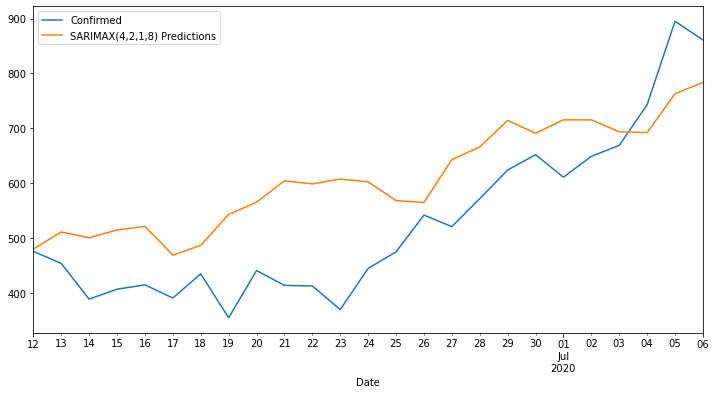

In [25]:
# Obtain predicted values
ax = test[para].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
# df['forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [26]:
# # from statsmodels.tools.eval_measures import rmse
# from statsmodels.tools.eval_measures import mse

# error = mse(test[para], predictions)
# # print(f'ARIMA(2,2,1) RMSE Error: {error:11.10}')
# # print(f'ARIMA(2,2,1) MSE Error: {error:11.10}')
# print(f'SARIMAX(2,2,1,3) MSE Error: {error:11.10}')

In [27]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test[para], predictions)
MAE

100.76903503673988

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# per_MAPE = (MAPE/sum(test[para]))*100
per_MAPE = mean_absolute_percentage_error(test[para], predictions)
print(per_MAPE,'%')

0.7623045240694446 %


In [29]:
type(predictions)

pandas.core.series.Series

In [30]:
df['forecast'] = predictions
df

,Confirmed,Recovered,Decreased,d1,forecast
Date,,,,,
2020-03-14,0,0,0,NaN,NaN
2020-03-15,0,0,0,NaN,NaN
2020-03-16,0,0,0,0.0,NaN
2020-03-17,1,0,0,1.0,NaN
2020-03-18,0,0,0,-2.0,NaN
...,...,...,...,...,...
2020-07-02,649,509,16,79.0,715.377121
2020-07-03,669,534,18,-18.0,693.852729
2020-07-04,743,595,19,54.0,692.241804


In [31]:
dictt = {f'{para}':test[para],f'Predicted_{para}':predictions}
dictt

{'Confirmed': Date
 2020-06-12    476
 2020-06-13    454
 2020-06-14    389
 2020-06-15    407
 2020-06-16    415
 2020-06-17    391
 2020-06-18    435
 2020-06-19    355
 2020-06-20    441
 2020-06-21    414
 2020-06-22    413
 2020-06-23    370
 2020-06-24    445
 2020-06-25    475
 2020-06-26    542
 2020-06-27    521
 2020-06-28    572
 2020-06-29    624
 2020-06-30    652
 2020-07-01    611
 2020-07-02    649
 2020-07-03    669
 2020-07-04    743
 2020-07-05    895
 2020-07-06    861
 Freq: D, Name: Confirmed, dtype: int64,
 'Predicted_Confirmed': 2020-06-12    480.036247
 2020-06-13    511.275847
 2020-06-14    500.677207
 2020-06-15    514.906621
 2020-06-16    521.360034
 2020-06-17    469.183379
 2020-06-18    486.885003
 2020-06-19    543.296845
 2020-06-20    565.444740
 2020-06-21    604.497600
 2020-06-22    598.776678
 2020-06-23    607.662556
 2020-06-24    602.499447
 2020-06-25    568.415129
 2020-06-26    564.983694
 2020-06-27    643.151687
 2020-06-28    666.050806


In [32]:
predicted_df = pd.DataFrame(dictt)
predicted_df

,Confirmed,Predicted_Confirmed
Date,,
2020-06-12,476,480.036247
2020-06-13,454,511.275847
2020-06-14,389,500.677207
2020-06-15,407,514.906621
2020-06-16,415,521.360034
2020-06-17,391,469.183379
2020-06-18,435,486.885003
2020-06-19,355,543.296845
2020-06-20,441,565.444740


In [33]:
predicted_df.to_csv('Predicted_WB.csv')
# predicted_csv = pd.read_csv('Predicted_WB.csv')

# predicted_csv.Date = pd.to_datetime(predicted_csv.Date)
# predicted_csv.set_index('Date', inplace=True)
# predicted_csv.index.freq = 'D'
# # print(predicted_csv)
# # predicted_csv = pd.concat([predicted_csv,predicted_df],axis=1,ignore_index=True)
# predicted_csv = pd.merge(predicted_csv, predicted_df, left_index=True, right_index=True, how='outer')
# # predicted_csv = predicted_csv.join(predicted_df, how='outer')
# print(predicted_csv)
# predicted_csv.to_csv('Predicted_WB.csv')

In [34]:
from pandas.tseries.offsets import DateOffset
import datetime
future_dates=[datetime.datetime(2020, 7, 7)+ DateOffset(n=x)for x in range(0,25)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [36]:
future_datest_df.tail()

,Confirmed,Recovered,Decreased,d1,forecast
2020-07-27,NaN,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN,NaN
2020-07-31,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])
future_df = future_df.drop("d1", axis=1)
future_df

,Confirmed,Recovered,Decreased,forecast
2020-03-14,0,0,0,NaN
2020-03-15,0,0,0,NaN
2020-03-16,0,0,0,NaN
2020-03-17,1,0,0,NaN
2020-03-18,0,0,0,NaN
...,...,...,...,...
2020-07-27,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN


In [38]:
future_df[[para, 'forecast']]

,Confirmed,forecast
2020-03-14,0,NaN
2020-03-15,0,NaN
2020-03-16,0,NaN
2020-03-17,1,NaN
2020-03-18,0,NaN
...,...,...
2020-07-27,NaN,NaN
2020-07-28,NaN,NaN
2020-07-29,NaN,NaN
2020-07-30,NaN,NaN


In [39]:
# future_df['forecast'] = results.predict(start = 115, end = 139, dynamic= True)
future_pred = results.predict(start=115, end=139, dynamic=False, typ='levels')

In [40]:
future_df['forecast'] = future_pred

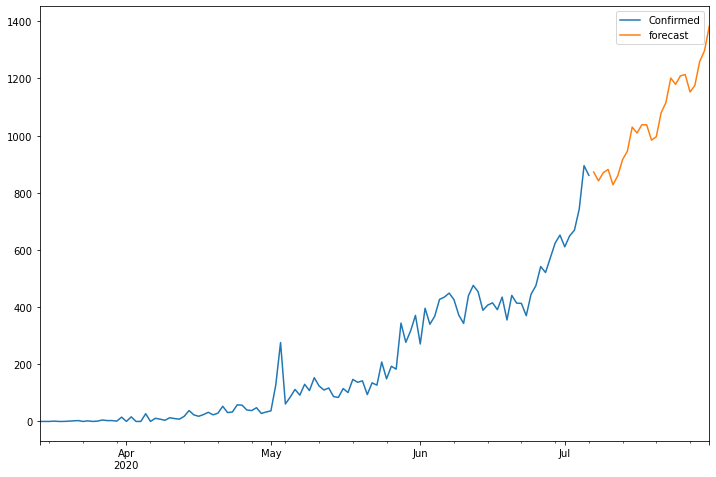

In [41]:
future_df[[para, 'forecast']].plot(figsize=(12, 8))

In [42]:
dicttt = {f'Future_Predicted_{para}':future_pred}
dicttt

{'Future_Predicted_Confirmed': 2020-07-07     872.550449
 2020-07-08     841.864642
 2020-07-09     870.818906
 2020-07-10     881.674017
 2020-07-11     828.086136
 2020-07-12     859.877723
 2020-07-13     916.093254
 2020-07-14     946.111125
 2020-07-15    1029.870908
 2020-07-16    1009.111592
 2020-07-17    1038.005734
 2020-07-18    1037.934598
 2020-07-19     984.081849
 2020-07-20     996.421336
 2020-07-21    1079.890808
 2020-07-22    1116.084375
 2020-07-23    1201.381651
 2020-07-24    1179.412847
 2020-07-25    1209.252232
 2020-07-26    1213.796752
 2020-07-27    1153.001983
 2020-07-28    1175.579364
 2020-07-29    1259.281938
 2020-07-30    1296.633814
 2020-07-31    1383.329689
 Freq: D, dtype: float64}

In [43]:
future_predicted_df = pd.DataFrame(dicttt)
future_predicted_df

,Future_Predicted_Confirmed
2020-07-07,872.550449
2020-07-08,841.864642
2020-07-09,870.818906
2020-07-10,881.674017
2020-07-11,828.086136
2020-07-12,859.877723
2020-07-13,916.093254
2020-07-14,946.111125
2020-07-15,1029.870908
2020-07-16,1009.111592


In [44]:
future_predicted_df.index.names = ['Date']
future_predicted_df.index.freq = 'D'
future_predicted_df.to_csv('Future_Predicted_WB.csv')

# future_predicted_csv = pd.read_csv('Future_Predicted_WB.csv')

# future_predicted_csv.Date = pd.to_datetime(future_predicted_csv.Date)
# future_predicted_csv.set_index('Date', inplace=True)
# future_predicted_csv.index.freq = 'D'
# # print(future_predicted_csv)
# # future_predicted_csv = pd.concat([future_predicted_csv,future_predicted_df],axis=1,ignore_index=True)
# future_predicted_csv = pd.merge(future_predicted_csv, future_predicted_df, left_index=True, right_index=True, how='outer')
# # predicted_csv = predicted_csv.join(predicted_df, how='outer')
# print(future_predicted_csv)
# future_predicted_csv.to_csv('Future_Predicted_WB.csv')